<a href="https://colab.research.google.com/github/Technorganic1/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Vincent_Emma's_LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=180.18849314523848, mobile=False), User(purchased=True, time_on_site=135.67700482149365, mobile=False), User(purchased=True, time_on_site=159.88535379510446, mobile=True), User(purchased=True, time_on_site=257.7835981679507, mobile=True), User(purchased=False, time_on_site=86.99445445027507, mobile=False), User(purchased=False, time_on_site=173.67358829592212, mobile=True), User(purchased=True, time_on_site=44.968058188901246, mobile=True), User(purchased=False, time_on_site=30.15219480121866, mobile=True), User(purchased=False, time_on_site=460.0007745853941, mobile=False), User(purchased=False, time_on_site=122.22911474525455, mobile=True)]


In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,180.188493,False
1,True,135.677005,False
2,True,159.885354,True
3,True,257.783598,True
4,False,86.994454,False


In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.395806383057993,5.457727420381445,6.012980358659168,6.370819673044487,6.526220869482321,6.618506115477453,6.744300972093091,6.937814523764514,7.022230321283178,7.738183255456649,...,570.7205763776294,572.579212329361,573.071762294419,577.5607756708825,578.0265919014007,578.8349054472059,584.0914381586123,586.960469433746,588.7975083689481,599.8083961016524
purchased,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,0,1,1
True,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,1,0,0


In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(4.801, 124.278]","(124.278, 243.161]","(243.161, 362.043]","(362.043, 480.926]","(480.926, 599.808]"
purchased,,,,,
False,240,233,105,29,28
True,96,131,102,20,16


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(4.801, 124.278]","(124.278, 243.161]","(243.161, 362.043]","(362.043, 480.926]","(480.926, 599.808]"
purchased,,,,,
False,0.714286,0.64011,0.507246,0.591837,0.636364
True,0.285714,0.35989,0.492754,0.408163,0.363636


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.672,0.622667
True,0.328,0.377333


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

!pip install pandas==0.23.4

In [3]:
!wget https://raw.githubusercontent.com/Technorganic1/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv

--2019-07-17 02:34:36--  https://raw.githubusercontent.com/Technorganic1/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17574 (17K) [text/plain]
Saving to: ‘persons.csv.4’

persons.csv.4       100%[===================>]  17.16K  --.-KB/s    in 0.007s  

2019-07-17 02:34:36 (2.49 MB/s) - ‘persons.csv.4’ saved [17574/17574]



In [0]:
!ls

persons.csv  sample_data


In [10]:
df = pd.read_csv('persons.csv')
print(df.shape)
df.head()

(1200, 4)


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [0]:
df.describe()

,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


In [0]:
df.count()             

Unnamed: 0       1200
age              1200
weight           1200
exercise_time    1200
dtype: int64

In [0]:
df.age.value_counts()  

41    32
34    29
69    28
71    27
33    26
29    26
38    25
55    24
57    24
28    24
51    23
19    23
64    23
40    22
47    22
59    22
61    22
49    22
39    21
44    21
35    21
30    21
23    21
67    21
52    20
32    20
18    20
68    20
74    20
63    19
      ..
73    19
70    19
80    19
21    18
75    18
72    18
24    17
20    17
56    17
27    16
76    16
48    16
66    16
36    15
37    15
58    15
79    15
65    15
62    15
26    15
54    14
78    14
77    13
60    13
50    13
43    13
46    13
53    12
45    10
42     8
Name: age, Length: 63, dtype: int64

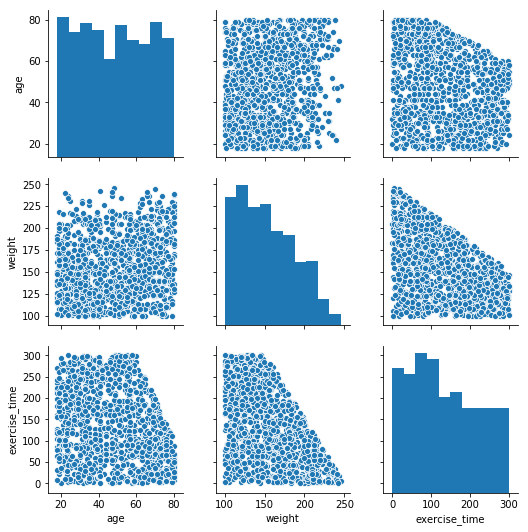

In [0]:
sns.pairplot(df.drop('Unnamed: 0', axis=1));

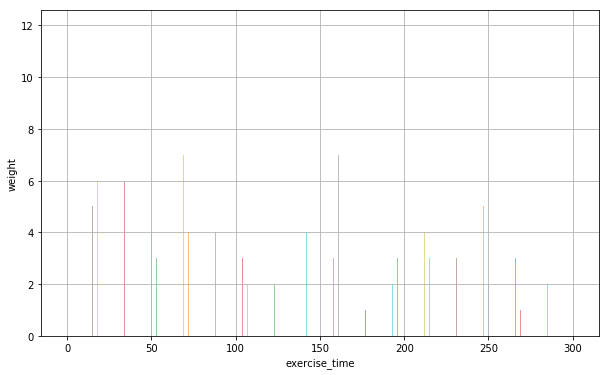

In [0]:
df.groupby('exercise_time').exercise_time.hist(bins=20, alpha=0.5, figsize=(10,6));
plt.ylabel('weight')
plt.xlabel('exercise_time');

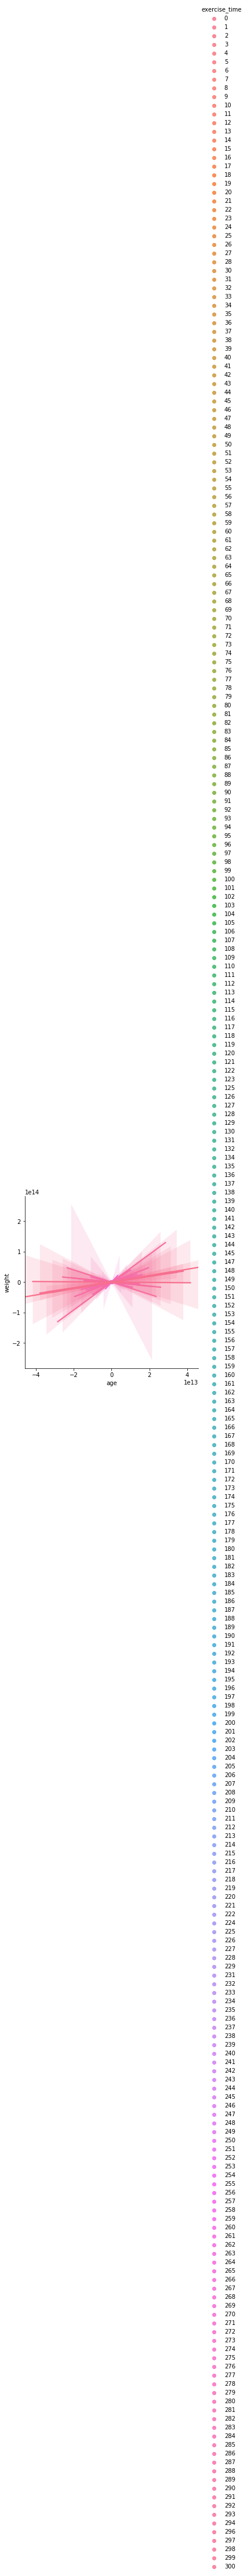

In [0]:
# I found a linear model from seaborn but it does read an error even though it prints out(seems rather extravagant and too long

sns.lmplot(x='age', y='weight', data=df, hue='exercise_time');

CPU times: user 43.2 s, sys: 25.4 s, total: 1min 8s
Wall time: 35.9 s


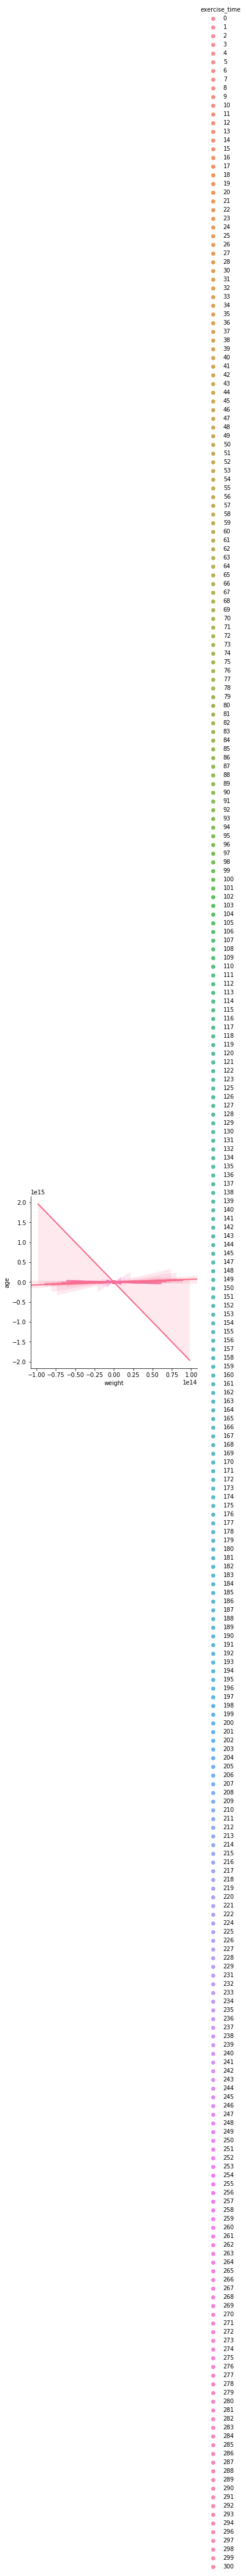

In [0]:
%%time
sns.lmplot(x='weight', y='age', data=df, hue='exercise_time');

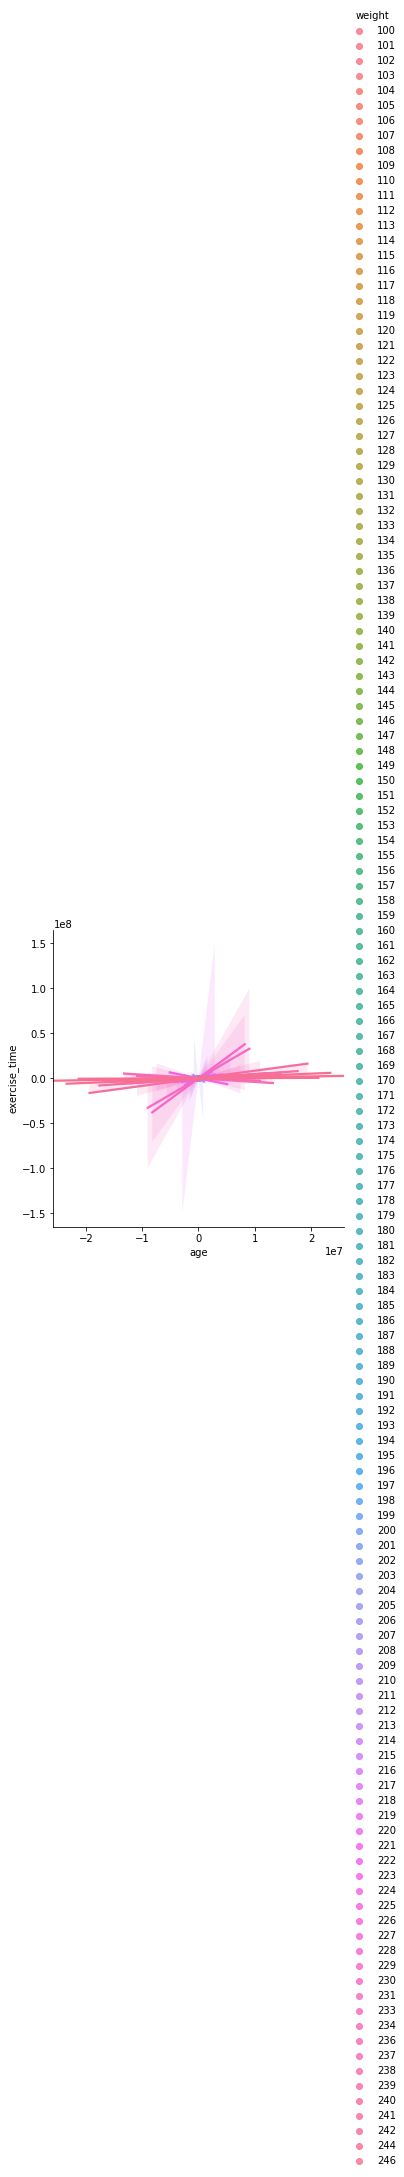

In [0]:
sns.lmplot(x='age', y='exercise_time', data=df, hue='weight');

In [12]:
age_bins = pd.cut(df['age'], 5)
time_bins = pd.cut(df['exercise_time'], 5)
weight_bins = pd.cut(df['weight'], 5)
pd.crosstab(weight_bins, time_bins , normalize='columns')

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
weight,,,,,
"(99.854, 129.2]",0.190647,0.205696,0.318386,0.411458,0.560209
"(129.2, 158.4]",0.158273,0.240506,0.300448,0.385417,0.387435
"(158.4, 187.6]",0.219424,0.294304,0.251121,0.197917,0.052356
"(187.6, 216.8]",0.273381,0.231013,0.130045,0.005208,0.000000
"(216.8, 246.0]",0.158273,0.028481,0.000000,0.000000,0.000000


In [0]:
age_and_weight_vs_time = pd.crosstab([age_bins, weight_bins], time_bins)
time_and_weight_vs_age = pd.crosstab([time_bins, weight_bins], age_bins)
time_and_age_vs_weight = pd.crosstab([time_bins, age_bins], weight_bins)

In [15]:
age_and_weight_vs_time

exercise_time                   (-0.3, 60.0]       ...        (240.0, 300.0]
age            weight                              ...                      
(17.938, 30.4] (99.854, 129.2]            10       ...                    25
               (129.2, 158.4]              7       ...                    15
               (158.4, 187.6]             11       ...                     3
               (187.6, 216.8]             17       ...                     0
               (216.8, 246.0]              7       ...                     0
(30.4, 42.8]   (99.854, 129.2]             8       ...                    33
               (129.2, 158.4]             10       ...                    21
               (158.4, 187.6]             10       ...                     3
               (187.6, 216.8]             17       ...                     0
               (216.8, 246.0]              7       ...                     0
(42.8, 55.2]   (99.854, 129.2]             7       ...                    38
               (129.2, 158.4]              7       ...                    26
               (158.4, 187.6]             11       ...                     3
               (187.6, 216.8]              9       ...                     0
               (216.8, 246.0]              7       ...                     0
(55.2, 67.6]   (99.854, 129.2]             7       ...                    11
               (129.2, 158.4]              6       ...                    12
               (158.4, 187.6]             10       ...                     1
               (187.6, 216.8]             15       ...                     0
               (216.8, 246.0]              8       ...                     0
(67.6, 80.0]   (99.854, 129.2]            21       ...                     0
               (129.2, 158.4]             14       ...                     0
               (158.4, 187.6]             19       ...                     0
               (187.6, 216.8]             18       ...                     0
               (216.8, 246.0]             15       ...                     0

[25 rows x 5 columns]

In [23]:
print(time_and_age_vs_weight);


weight                         (99.854, 129.2]       ...        (216.8, 246.0]
exercise_time  age                                   ...                      
(-0.3, 60.0]   (17.938, 30.4]               10       ...                     7
               (30.4, 42.8]                  8       ...                     7
               (42.8, 55.2]                  7       ...                     7
               (55.2, 67.6]                  7       ...                     8
               (67.6, 80.0]                 21       ...                    15
(60.0, 120.0]  (17.938, 30.4]                9       ...                     0
               (30.4, 42.8]                 19       ...                     0
               (42.8, 55.2]                  6       ...                     1
               (55.2, 67.6]                 10       ...                     1
               (67.6, 80.0]                 21       ...                     7
(120.0, 180.0] (17.938, 30.4]               17      

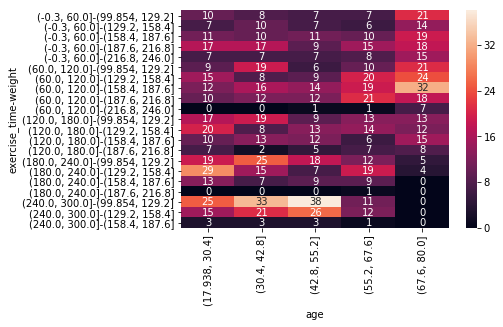

In [29]:
sns.heatmap(age_and_weight_vs_time, annot = True, fmt = 'd');

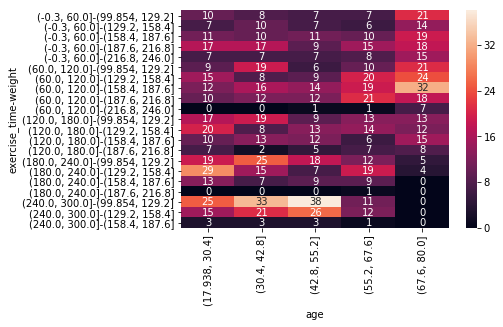

In [30]:
sns.heatmap(time_and_weight_vs_age, annot = True, fmt = 'd');

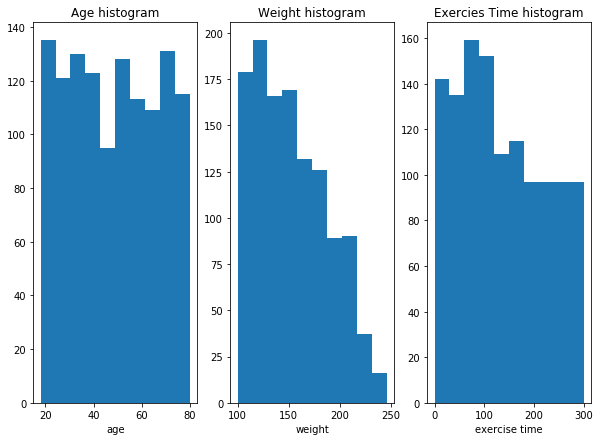

In [33]:
fig, ax = plt.subplots(1, 3, figsize = (10, 7))
ax[0].hist(df.age)
ax[0].set_xlabel('age')
ax[0].set_title('Age histogram')

ax[1].hist(df.weight)
ax[1].set_xlabel('weight')
ax[1].set_title('Weight histogram')

ax[2].hist(df.exercise_time)
ax[2].set_xlabel('exercise time')
ax[2].set_title('Exercies Time histogram');

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data? 
###The variables are all integers to start except for the Unamed column which is an index copy.
2.  What are the relationships between the variables?
### As shown in a linear module i created as age increases the exercise time also decreases, mostly.  Mostly because as weight can be misleading usually people who weigh more only exercise if they are younger. When if weight is an issue they should exercise regardless of age.
3.  Which relationships are "real", and which spurious?
### As age increases, exercise time drops is spurious. There is a negative correlation of weight and exercise time , heavier is less likely to exercise, this can also look spurious. 


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)